<a href="https://colab.research.google.com/github/BrishavDebnath/AI-ML_LAB/blob/main/LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exp 3: Use the Ames housing dataset , handle the missing values, then detect outliers using IQR method, remove the outliers, test the Preprocessed data for remaining issues (fewer or no extreme outliers) , save the clean data for future analysis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
df=pd.read_csv('AmesHousing.csv')

In [4]:
df[:]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [5]:
df.shape

(2930, 82)

**We take a column Lot Area and fill the missing values in it with the median of the column.Then we detect the outliers in the column by using a detect outliers function that uses the IQR method and then remove them from the dataframe by agin using a remove outliers function.**

<Axes: ylabel='Lot Area'>

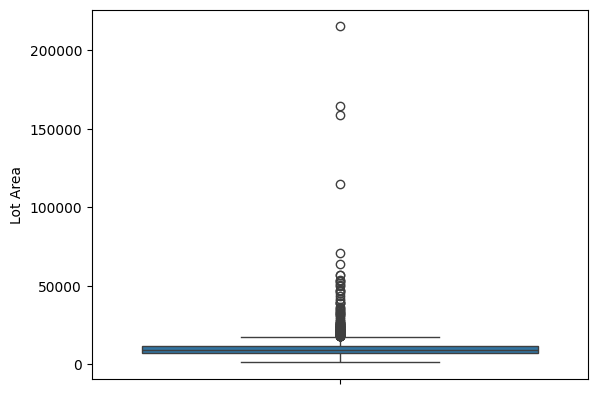

In [13]:
## Using boxplot to detect outliers in three columns.
sns.boxplot(df['Lot Area'])


In [14]:
## Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    """Detects outliers in a dataframe column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [15]:
outliers = detect_outliers_iqr(df, 'Lot Area')
print(f"Number of outliers in 'Lot Area': {len(outliers)}")

Number of outliers in 'Lot Area': 127


In [16]:
## Function to remove outliers that uses the IQR method
def remove_outliers(df, columns):
    """Removes outliers for specific columns using the IQR method."""
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [17]:
## creatng a list of columns to remove outliers from one by one.
columns = ['Lot Area']

In [18]:
df_cleaned = remove_outliers(df, columns)

In [19]:
print(f"Data shape after removing outliers from selected columns: {df_cleaned.shape}")

Data shape after removing outliers from selected columns: (2803, 82)


In [21]:
outliers1 = detect_outliers_iqr(df_cleaned, 'Lot Area')
print(f"Number of outliers in 'Lot Area': {len(outliers1)}")

Number of outliers in 'Lot Area': 34


<Axes: ylabel='Lot Area'>

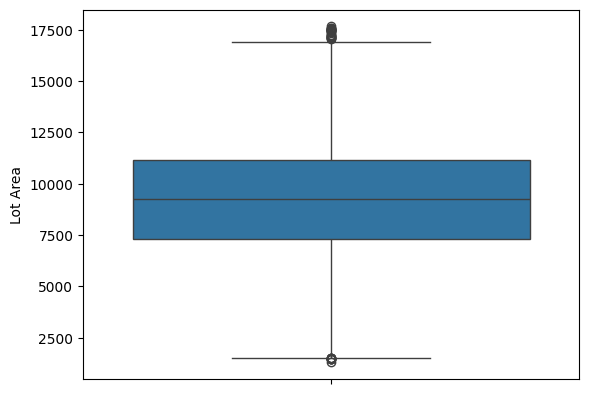

In [20]:
sns.boxplot(df_cleaned['Lot Area'])

In [23]:
## Saving the cleaned data in a new file for future analysis.
df_cleaned.to_csv('AmesHousing_Cleaned.csv',index=False)